### **Calculating the Signal in an RC Circuit Excited by a Square Wave**

This code calculates the expected signal from a linear RC circuit excited by a square wave. Specifically, we measure the **voltage across the resistor**, which is proportional to the circuit current.

---

### **Step 1: Response to a Single Sine Wave**

For a simple sine wave input, we can represent the signal in complex space as the imaginary part of an exponential:

$$
V_{\text{in}}(t) = \mathrm{Im} \left( V_0 e^{j\omega t} \right)
$$

where $j = \sqrt{-1}$.  
For a given frequency $\omega$, the current through the circuit is determined by the impedance $Z(\omega)$. Using Ohm’s law, the current is:

$$
I(t) = \mathrm{Im} \left( \frac{V_0 e^{j\omega t}}{Z(\omega)} \right)
$$

---

### **Step 2: Square Wave Representation**

A square wave can be written as a sum of sine waves using a Fourier series. The series representation is:

$$
V(t) = V_0 \sum_{i=0}^\infty \frac{4}{(2i+1)\pi} \sin\left( \frac{2\pi(2i+1)t}{T} \right)
$$

Here:
- $T$ is the period of the square wave.
- $i$ represents the index of each harmonic.

Alternatively, this can be expressed as the **imaginary part** of a complex exponential sum:

$$
V(t) = \mathrm{Im} \left[ V_0 \sum_{i=0}^\infty \frac{4}{(2i+1)\pi} \exp\left( j \frac{2\pi(2i+1)t}{T} \right) \right]
$$

---

### **Step 3: Simplifying the Fourier Series**

We can rewrite the square wave in terms of the harmonic frequencies $\omega_i = \frac{2\pi(2i+1)}{T}$ and their corresponding amplitudes $A_i = \frac{4}{(2i+1)\pi}$. This gives:

$$
V(t) = \mathrm{Im} \left[ V_0 \sum_{i=0}^\infty A_i e^{j\omega_i t} \right]
$$

---

### **Step 4: Current Response in the RC Circuit**

For an RC circuit, the impedance is given by:

$$
Z(\omega) = R + \frac{1}{j\omega C}
$$

The current through the circuit can then be calculated as:

$$
I(t) = \frac{V(t)}{Z(\omega)}
$$

Substituting the Fourier series for $V(t)$, we find:

$$
I(t) = \mathrm{Im} \left[ \frac{V_0}{R + \frac{1}{j\omega C}} \sum_{i=0}^\infty A_i e^{j\omega_i t} \right]
$$

---

### **Summary**

This formulation allows us to calculate the output current $I(t)$ for an RC circuit excited by a square wave. By summing over all Fourier components of the input signal, we capture both the amplitude attenuation and phase shifts introduced by the circuit for each harmonic.




In [2]:
import numpy as  np
import scipy.constants as scc
from matplotlib import pyplot as plt
# these happen to be the component values I have on hand
C = 39000*scc.pico
R = 47*scc.kilo
tau = R*C 
print(f'RC time constant = {tau:5.2e} s')

RC time constant = 1.83e-03 s


C:\Users\th0lxl1\AppData\Local\Temp\ipykernel_109104\3348245050.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


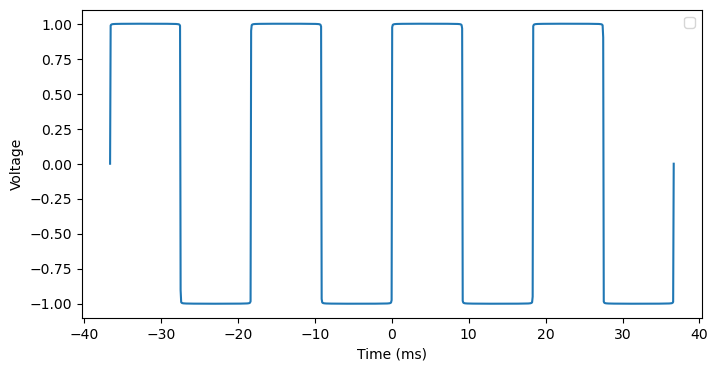

In [3]:
# Parameters
N = 1000                # Number of Fourier terms
T = tau * 5            # Period of the square wave
harmonic_index = np.arange(N)  # Array of harmonic indices (0 to N-1)

# Fourier series components
omega = ((2 * harmonic_index + 1) * scc.pi / T)[:,None]  # Angular frequencies
amplitudes = 4 / ((2 * harmonic_index + 1) * scc.pi)[:,None]         # Fourier amplitudes

# Time domain: 4 periods before and after 0
time = np.linspace(-4 * T, 4 * T, 1000)

# Vectorized Fourier series calculation
V = np.sum(amplitudes * np.exp(1j * omega * time), axis=0)

# Plot the imaginary part of the square wave
plt.figure(figsize=(8, 4))
plt.plot(time/scc.milli, np.imag(V))
plt.xlabel("Time (ms)")
plt.ylabel("Voltage")
plt.legend()


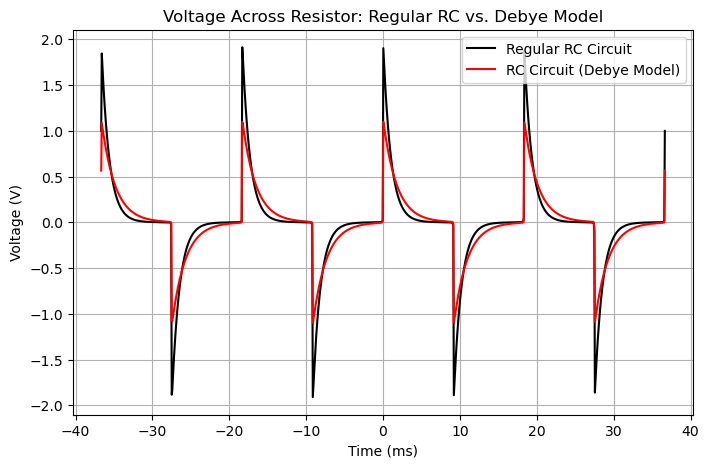

In [4]:
# Parameters
R = 1000  # Resistance in ohms
C = 1e-6  # Capacitance in farads
tau_d = 0.75 * scc.milli  # Debye relaxation time in seconds

# Precompute terms to avoid redundancy
amplitude_exp = amplitudes * np.exp(1j * omega * time)  # Combine amplitudes and exp_term

# Impedance for the regular RC circuit
Z = R - 1j / omega / C  # Impedance for each frequency component
V_resistor = R * np.sum(amplitude_exp / Z, axis=0)  # Voltage across resistor (regular RC)

# Impedance for the Debye model
C_d = C / (1 + 1j * omega * tau_d)  # Debye capacitance
Zd = R - 1j / omega / C_d           # Impedance for Debye model
V_resistor_d = R * np.sum(amplitude_exp / Zd, axis=0)  # Voltage across resistor (Debye RC)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(time / scc.milli, np.imag(V_resistor), '-k', label="Regular RC Circuit")
plt.plot(time / scc.milli, np.imag(V_resistor_d), '-r', label="RC Circuit (Debye Model)")
plt.xlabel("Time (ms)")  # Time in milliseconds
plt.ylabel("Voltage (V)")  # Voltage in volts
plt.title("Voltage Across Resistor: Regular RC vs. Debye Model")
plt.legend()
plt.grid()
plt.show()



### Now we consider the effect of input impedance and capacitance from the arduino



For an RC circuit where the readout point 

If we include the scope impedence $R_s$ and capacitance $C_s$ then the voltage drop measured by the scope, is actually the voltage drop accross its internal capacitance.  

Let 

- $X_c = -i/\omega C$ be the reactance of our capacitor.
- $R$ be the load resistance
- $R_s$ the scope impedence
- $X_s = -i/\omega C_s$ the scope reactance

Then the total circuit impedence is 

$$
Z_t = X_c + \frac{1}{\frac{1}{R} + \frac{1}{R_s} + \frac{1}{X_s}}
$$


The current through the circuit can then be calculated as:

$$
I(t) = \frac{V(t)}{Z_t(\omega)}
$$

Substituting the Fourier series for $V(t)$, we find:

$$
I(t) = \mathrm{Im} \left[ \frac{V_0}{\left( X_c + \frac{1}{\frac{1}{R} + \frac{1}{R_s} + \frac{1}{X_s} }\right)}\sum_{i=0}^\infty A_i e^{j\omega_i t} \right]
$$

Here $X_c = -1/i\omega C$ and $X_s = -1/i \omega C_s$



(1.0, 10.0)

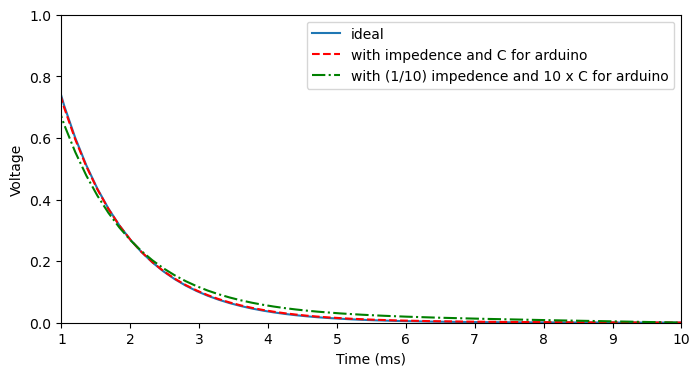

In [5]:
Cs = 14*scc.pico 
Rs = 100*scc.mega
C = 1*scc.nano
R = 1*scc.mega
tau = R*C
N = 1000                # Number of Fourier terms
T = tau * 20           # Period of the square wave
harmonic_index = np.arange(N)  # Array of harmonic indices (0 to N-1)

# Fourier series components
omega = ((2 * harmonic_index + 1) * scc.pi / T)[:,None]  # Angular frequencies
amplitudes = 4 / ((2 * harmonic_index + 1) * scc.pi)[:,None]         # Fourier amplitudes

# Time domain: 4 periods before and after 0
time = np.linspace(-4 * T, 4 * T, 1000)

# Vectorized Fourier series calculation

# Impedance for the regular RC circuit
 
Z  = R + 1/(1j * omega * C)
V_resistor = R * np.sum(amplitude_exp / Z, axis=0)  # Voltage across resistor (regular RC)
Z  = 1/(1/R + 1/Rs + 1j*omega*Cs) + 1/(1j * omega * C)
V_resistor_2  = R * np.sum(amplitude_exp / Z, axis=0)  # Voltage across resistor (regular RC)

Cs = 14*scc.pico*10
Rs = 100*scc.mega/10
Z  = 1/(1/R + 1/Rs + 1j*omega*Cs) + 1/(1j * omega * C)
V_resistor_3  = R * np.sum(amplitude_exp / Z, axis=0)  # Voltage across resistor (regular RC)

# Plot the imaginary part of the square wave
plt.figure(figsize=(8, 4))
plt.plot(time/scc.milli, np.imag(V_resistor), label = 'ideal')
plt.plot(time/scc.milli, np.imag(V_resistor_2),'--r', label = 'with impedence and C for arduino')
plt.plot(time/scc.milli, np.imag(V_resistor_3),'-.g', label = 'with (1/10) impedence and 10 x C for arduino')
plt.xlabel("Time (ms)")
plt.ylabel("Voltage")
plt.legend()
plt.ylim(0,1)
plt.xlim(1,10)


We assume a square wave input as a sum of harmonic frequencies $\omega_i = \frac{2\pi(2i+1)}{T}$ and their corresponding amplitudes $A_i = \frac{4}{(2i+1)\pi}$. This gives:

$$
V(t) = \mathrm{Im} \left[ V_0 \sum_{i=0}^\infty A_i e^{j\omega_i t} \right]
$$

Now consider a capacitor with a dielectric constant given by:

$$
\kappa = 1 -\frac{i}{R\omega C_0} + \frac{\chi}{1-i\omega \tau}
$$

If we put this in a voltage divider circuit with a resistor of value $R_L$ then at frequency $\omega$ the voltage accross the capacitor will be given by:

$$
V(\omega) =  \frac{-i}{\omega \kappa C_0} + R
$$

To find how this depends on time, we sum this voltage over all the Fourrier modes in a square wave and then take the imaginary part 

In [20]:
A = np.pi*(1*scc.inch)**2
d = .5*scc.milli 
C_0 = scc.epsilon_0*A/d
T = 1000/3.5
tau = np.exp(-7)
print(tau)
omega_M = 4000*2*np.pi #extrapolation to 300K?
# R = 1/(C_0*omega_M*np.exp(3))
R_L = 18*scc.mega*scc.centi*d/A
print(f'Leakage Resistance = {R_L:.2e}')
chi = 20


0.0009118819655545162
Leakage Resistance = 4.44e+04


(0.0, 2.0)

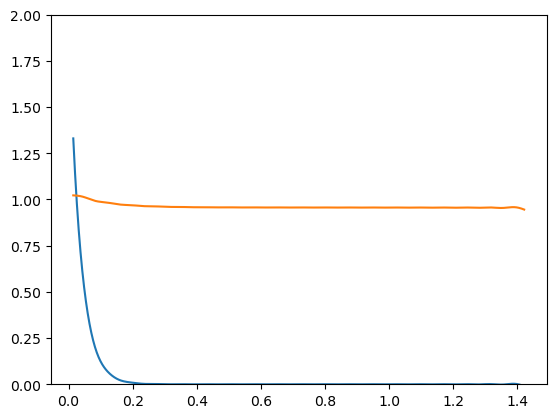

In [47]:
R = 1*scc.mega 
# Precompute terms to avoid redundancy
# Fourier series components
# Parameters
N = 1000                # Number of Fourier terms
T = R*C_0 * 40             # Period of the square wave
# Time domain: 4 periods before and after 0
time = np.linspace(0.01*T, .99 * T, 1000)
harmonic_index = np.arange(N)  # Array of harmonic indices (0 to N-1)

omega = ((2 * harmonic_index + 1) * scc.pi / T)[:,None]           # Angular frequencies
amplitudes = 4 / ((2 * harmonic_index + 1) * scc.pi)[:,None]      # Fourier amplitudes
amplitude_exp = amplitudes * np.exp(1j * omega * time)            # Combine amplitudes and exp_term

# Impedance for the regular RC circuit

kappa = 1
Z = R - 1j / omega / C_0 /kappa  # Impedance for each frequency component
V_resistor = R * np.sum(amplitude_exp / Z, axis=0)  # Voltage across resistor (regular RC)

plt.plot(time/scc.milli,np.imag(V_resistor))

kappa = 1 -1j/(omega*C_0*R_L) + chi/(1-1j*omega*tau) + 60
Z = R - 1j / omega / C_0 /kappa  # Impedance for each frequency component
V_resistor = R * np.sum(amplitude_exp / Z, axis=0)  # Voltage across resistor (regular RC)
plt.plot(time/scc.milli,np.imag(V_resistor))

plt.yscale('linear')
plt.ylim(0,2)